
<h1 align="center"> Assignment - 1 (Machine Learning) </h1>

<h2 align="left"> Linear Regression </h2> 
<h4 align="right" > 
    Author: <a href="https://jimut123.github.io/">Jimut Bahan Pal </a>
</h4> 

#### As usual, importing the necessary libraries

In [76]:
import numpy as np                                          # just an opensource version of mini-matlab for matrix mult and stuffs
import matplotlib.pyplot as plt                             # plotting library
import matplotlib.patches as mpatches                       # cool patches
from mpl_toolkits.mplot3d import Axes3D                     # 3D stuffs
from sklearn import datasets, linear_model                  # ML lib
from sklearn.datasets import make_regression                # autocreation of dataset and stuffs
from sklearn.linear_model import LinearRegression           # Linear Regression module
from sklearn.preprocessing import PolynomialFeatures        # ploynomial regression
from sklearn.metrics import mean_squared_error, r2_score    # for generating RMSE and other metrics for eval.

## Part - A 

#### Creation of 1D dataset


Artificially generated 1D dataset, using y = $m$x + $\epsilon$. Here, Gaussian noise $\epsilon$ = 6.

In [77]:
X, y = make_regression(n_samples=100, n_features=1, noise=6)

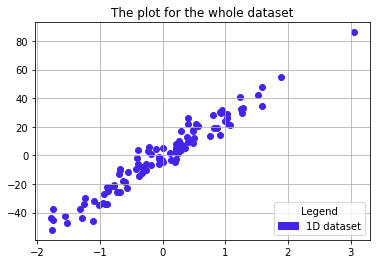

In [78]:
# plot regression dataset

fig, ax = plt.subplots()

ax.set_title('The plot for the whole dataset')
scatter = ax.scatter(X,y,color='#4224eb')
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)

red_patch = mpatches.Patch(color='#4224eb', label='1D dataset')
plt.legend(handles=[red_patch],loc="lower right", title="Legend")

ax.grid(True)
plt.show()


In [79]:

# Split the data into training/testing sets
X_train = X[:-20]
X_test = X[-20:]

# Split the targets into training/testing sets
y_train = y[:-20]
y_test = y[-20:]


In [80]:
# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [81]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)
print(y_pred)

[-50.22764936  -8.23980391  21.37777125 -49.43122707 -17.46700868
 -26.89924953  -2.26277484   9.91762861  14.55016599  27.72411913
 -35.53898008   7.19011314  -7.13377952 -21.22369842 -20.21989661
   6.58208755  33.6071665  -16.80304129  10.52432491 -49.7280335 ]


#### Root mean squared error

In [82]:
# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print('Root Mean squared error [RMSE]: %.2f'
      % np.sqrt(mean_squared_error(y_test, y_pred)))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))


Coefficients: 
 [27.68789241]
Root Mean squared error [RMSE]: 6.62
Coefficient of determination: 0.93


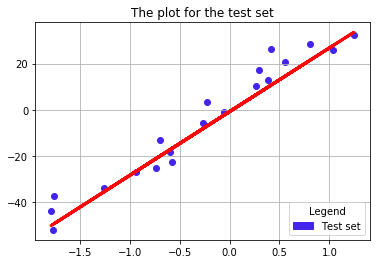

In [83]:
# Plot outputs

fig, ax = plt.subplots()

ax.set_title('The plot for the test set')
scatter = ax.scatter(X_test, y_test,color='#4224eb')
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)

red_patch = mpatches.Patch(color='#4224eb', label='Test set')
plt.legend(handles=[red_patch],loc="lower right", title="Legend")

plt.plot(X_test, y_pred, color='#f90909', linewidth=3)

# plt.xticks(())
# plt.yticks(())

ax.grid(True)
plt.show()

***

## Part - B

#### Creation of 4D dataset


${h _\theta }\left( x \right) = {\theta _0} + {\theta _1}{x _1} + {\theta _2}x _1^2 + {\theta _3}x _1^3 + ... + {\theta _n}x _1^n$

In [84]:
X, y = make_regression(n_samples=100, n_features=4, noise=6)

#### So we can see this has 4 features, i.e. 4 columns

In [85]:
X

array([[-2.15226364e+00, -5.00218872e-01,  1.11450604e+00,
        -1.86073162e-01],
       [ 1.64817412e+00,  4.57225473e-01,  1.06333539e+00,
         6.80776250e-01],
       [ 6.64231789e-01,  2.33461926e-01, -2.36015528e+00,
        -1.52245598e+00],
       [ 7.30918837e-01, -1.93838555e+00, -1.78745978e+00,
         4.49551570e-01],
       [-1.24331388e+00, -7.45916438e-01,  4.60316519e-02,
        -1.35155844e+00],
       [ 3.53479852e-01,  4.84011368e-01,  4.41739355e-01,
        -8.61682521e-01],
       [ 1.15591173e+00, -1.11363617e-01,  2.39132012e-01,
         4.88286470e-01],
       [-4.24086950e-01,  9.38457761e-01, -1.44039846e-02,
         7.81324962e-01],
       [-1.34629031e-02, -9.71058921e-02, -3.53644981e-01,
        -9.17978580e-01],
       [-1.16412511e+00,  6.88415286e-01,  4.17606506e-01,
        -2.76615899e-01],
       [ 4.85460259e-01,  2.43031371e-01, -1.11334016e+00,
         6.01926654e-01],
       [-2.54451502e-01,  7.63103671e-01, -4.55841314e-01,
      

#### We can select the first column .i.e. $x_1$

In [86]:
X[:,0]

array([-2.15226364e+00,  1.64817412e+00,  6.64231789e-01,  7.30918837e-01,
       -1.24331388e+00,  3.53479852e-01,  1.15591173e+00, -4.24086950e-01,
       -1.34629031e-02, -1.16412511e+00,  4.85460259e-01, -2.54451502e-01,
        3.19170344e-01,  2.88328675e+00, -4.05392026e-02, -2.13404672e+00,
        1.69036265e+00,  1.08217900e+00, -3.59947193e-01, -1.72884257e+00,
        6.56253367e-01,  1.03747720e-01,  5.52313935e-01,  8.07707427e-01,
       -1.22058277e+00, -1.74534555e+00,  3.50983275e-01,  5.20978381e-01,
       -6.63279332e-02, -1.41889718e-01, -2.85630842e+00,  1.36188542e+00,
        3.02878923e-01,  4.83117416e-01,  4.52327016e-01,  1.59097160e+00,
       -7.51783966e-01, -1.37971920e+00, -2.45851105e-01,  5.71508808e-01,
        2.09271120e-02,  1.00331223e+00, -5.28583143e-01,  5.31978428e-02,
       -1.76896653e-01,  4.19768969e-01, -8.86406716e-01,  2.39448259e-01,
        1.00186033e-01,  2.50251720e+00, -1.58234011e+00, -4.98851514e-01,
       -8.77913308e-01,  

#### Creating the train and test dataset

In [87]:

# Split the data into training/testing sets
X_train = X[:-20]
X_test = X[-20:]

# Split the targets into training/testing sets
y_train = y[:-20]
y_test = y[-20:]

#### Training

In [88]:
polynomial_features= PolynomialFeatures(degree=4)
x_poly = polynomial_features.fit_transform(X_train)
x_test_poly = polynomial_features.fit_transform(X_test)

model = LinearRegression()
model.fit(x_poly, y_train)
y_poly_pred = model.predict(x_test_poly)


#### Root Mean Squared Error

In [89]:
rmse = np.sqrt(mean_squared_error(y_test,y_poly_pred))
r2 = r2_score(y_test,y_poly_pred)
print("Root Mean Squared Error [RMSE] : ",rmse)
print("R-2 score : ",r2)

Root Mean Squared Error [RMSE] :  48.28276313969695
R-2 score :  0.9155798975007788


 <hr size="30"> 
 
 
 ****

#### One of the problems for visualising 4D data is, it can't be visualised spatially, so, for the sake of experiment, I have tried to use heatmap as another dimension. Just trying to recreate <a href="https://stackoverflow.com/questions/14995610/how-to-make-a-4d-plot-with-matplotlib-using-arbitrary-data" target="_blank">this stuff</a>. Column 1,2,3 and 4 are the four features and they represent some of the dimension in this plot.

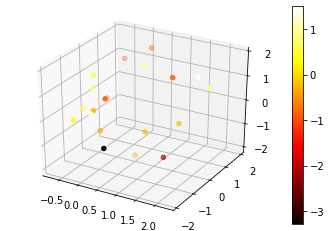

In [90]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

img = ax.scatter(X_test[:,0], X_test[:,1], X_test[:,2], c=X_test[:,3], cmap=plt.hot())
fig.colorbar(img)
plt.show()

#### Now a struggle to display the plot for 4D surface. Just trying to recreate <a href="https://stackoverflow.com/questions/14995610/how-to-make-a-4d-plot-with-matplotlib-using-arbitrary-data" target="_blank">this stuff</a> for visualising 4D.

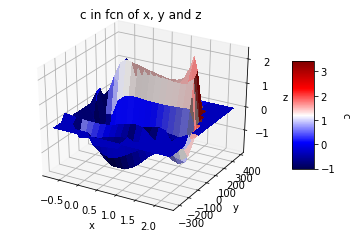

In [91]:
import matplotlib
from scipy.interpolate import griddata
from matplotlib import cm

name_color_map = 'seismic';
list_name_variables = ['x', 'y', 'z', 'c'];
index_x = 0; index_y = 1; index_z = 2; index_c = 3;

# X-Y are transformed into 2D grids. It's like a form of interpolation
X_test_1 = np.linspace(X_test[:,0].min(), X_test[:,0].max(), len(np.unique(X_test[:,0]))); 
y_test = np.linspace(y_test.min(), y_test.max(), len(np.unique(y_test)));
x2, y2 = np.meshgrid(X_test_1, y_test);

# Interpolation of Z: old X-Y to the new X-Y grid.
# Note: Sometimes values can be < z.min and so it may be better to set 
# the values too low to the true minimum value.
z2 = griddata( (X_test[:,0], y_test), X_test[:,1], (x2, y2), method='cubic', fill_value = 0);
z2[z2 < X_test[:,1].min()] = X_test[:,1].min();

# Interpolation of C: old X-Y on the new X-Y grid (as we did for Z)
# The only problem is the fact that the interpolation of C does not take
# into account Z and that, consequently, the representation is less 
# valid compared to the previous solutions.
c2 = griddata( (X_test[:,0], y_test), X_test[:,2], (x2, y2), method='cubic', fill_value = 0);
c2[c2 < X_test[:,2].min()] = X_test[:,2].min(); 

#--------
color_dimension = c2; # It must be in 2D - as for "X, Y, Z".
minn, maxx = color_dimension.min(), color_dimension.max();
norm = matplotlib.colors.Normalize(minn, maxx);
m = plt.cm.ScalarMappable(norm=norm, cmap = name_color_map);
m.set_array([]);
fcolors = m.to_rgba(color_dimension);

# At this time, X-Y-Z-C are all 2D and we can use "plot_surface".
fig = plt.figure(); ax = fig.gca(projection='3d');
surf = ax.plot_surface(x2, y2, z2, facecolors = fcolors, linewidth=0, rstride=1, cstride=1,
                       antialiased=False);
cbar = fig.colorbar(m, shrink=0.5, aspect=5);
cbar.ax.get_yaxis().labelpad = 15; cbar.ax.set_ylabel(list_name_variables[index_c], rotation = 270);
ax.set_xlabel(list_name_variables[index_x]); ax.set_ylabel(list_name_variables[index_y]);
ax.set_zlabel(list_name_variables[index_z]);
plt.title('%s in fcn of %s, %s and %s' % (list_name_variables[index_c], list_name_variables[index_x], list_name_variables[index_y], list_name_variables[index_z]) );
plt.show();

#### References

1. Dripta Maharaj, (2020), Slides, availabe on web <a href="https://sites.google.com/view/da220-2019-20"> https://sites.google.com/view/da220-2019-20 </a>, last accessed on 16.1.2020.


2. Brownlee, J., (2018), How to Generate Test Datasets in Python with scikit-learn, availabe on web <a href="https://machinelearningmastery.com/generate-test-datasets-python-scikit-learn/"> https://machinelearningmastery.com/generate-test-datasets-python-scikit-learn/ </a>, last accessed on 16.1.2020.


3. Scikit-learn documentation, Linear Regression Example, availabe on web <a href="https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py"> https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py </a>, last accessed on 16.1.2020.


4. user2386081, (2013), Matplotlib scatter plot legend, <a href="https://stackoverflow.com/questions/17411940/matplotlib-scatter-plot-legend"> https://stackoverflow.com/questions/17411940/matplotlib-scatter-plot-legend </a>, last accessed on 16.1.2020.


5. Dixon & Moe, (2015), Searching for that perfect color has never been easier, use our HTML color picker to browse millions of colors and color harmonies.  <a href="https://htmlcolorcodes.com/color-picker/"> https://htmlcolorcodes.com/color-picker/ </a>, last accessed on 16.1.2020.


6. Matplotlib documentation, Scatter plots with a legend, <a href="https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/scatter_with_legend.html"> https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/scatter_with_legend.html </a>, last accessed on 16.1.2020.


7. Tengis, (2013), How to make a 4d plot with matplotlib using arbitrary data,  <a href="https://stackoverflow.com/questions/14995610/how-to-make-a-4d-plot-with-matplotlib-using-arbitrary-data"> https://stackoverflow.com/questions/14995610/how-to-make-a-4d-plot-with-matplotlib-using-arbitrary-data </a>, last accessed on 16.1.2020.


8. Agarwal, A., (2018), Polynomial Regression, Towards datascience, <a href="https://towardsdatascience.com/polynomial-regression-bbe8b9d97491"> https://towardsdatascience.com/polynomial-regression-bbe8b9d97491 </a>, last accessed on 16.1.2020 .


#### Acknowledgements

* Dripta Maharaj